#### Imports


In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [39]:
df = pd.read_csv('bottle.csv')
df_binary = df[['Salnty', 'T_degC']]
 
# Taking only the selected two attributes from the dataset
df_binary.columns = ['Sal', 'Temp']
#display the first 5 rows
df_binary.head()

C:\Users\Wouter\AppData\Local\Temp\ipykernel_16132\2534118310.py:1: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('bottle.csv')


,Sal,Temp
0,33.440,10.50
1,33.440,10.46
2,33.437,10.46
3,33.420,10.45
4,33.421,10.45


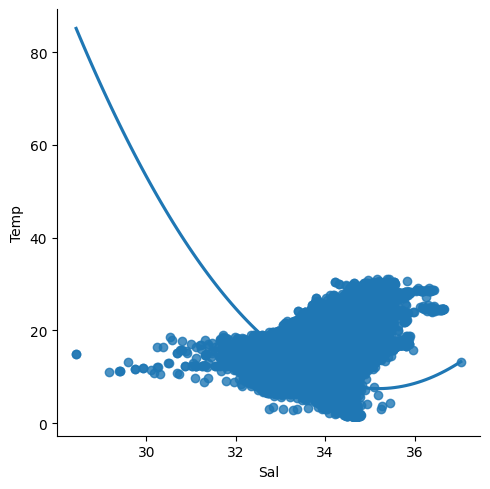

In [40]:
#plotting the Scatter plot to check relationship between Sal and Temp
sns.lmplot(x ="Sal", y ="Temp", data = df_binary, order = 2, ci = None)
plt.show()

Cleaning

In [41]:
df_binary.fillna(method ='bfill', inplace = True)

C:\Users\Wouter\AppData\Local\Temp\ipykernel_16132\1121764882.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary.fillna(method ='bfill', inplace = True)


Training the model

In [42]:
X = np.array(df_binary['Sal']).reshape(-1, 1)
y = np.array(df_binary['Temp']).reshape(-1, 1)
 
# Separating the data into independent and dependent variables
# Converting each dataframe into a numpy array
# since each dataframe contains only one column
df_binary.dropna(inplace = True)
 
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
 
# Splitting the data into training and testing data
regr = LinearRegression()
 
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.20345093432772587


C:\Users\Wouter\AppData\Local\Temp\ipykernel_16132\4224368462.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary.dropna(inplace = True)


Exploring results

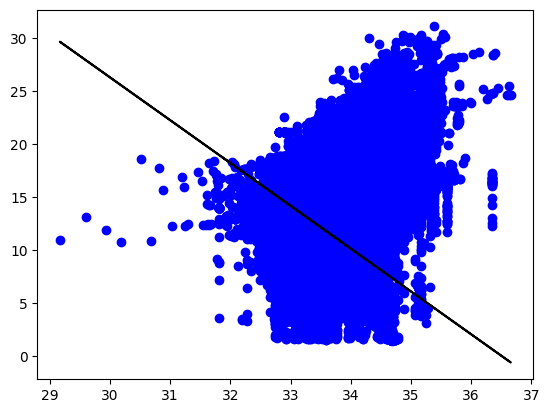

In [43]:
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
 
plt.show()
# Data scatter of predicted values

Creating a smaller dataset

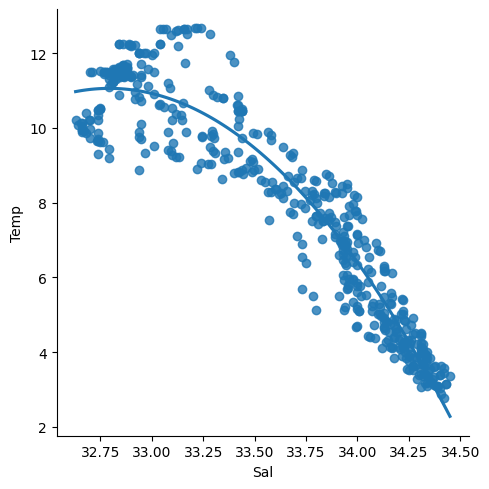

In [44]:
df_binary500 = df_binary[:][:500]
   
# Selecting the 1st 500 rows of the data
sns.lmplot(x ="Sal", y ="Temp", data = df_binary500,
                               order = 2, ci = None)

Repeat steps

In [45]:
df_binary500.fillna(method ='bfill', inplace = True)
 
X = np.array(df_binary500['Sal']).reshape(-1, 1)
y = np.array(df_binary500['Temp']).reshape(-1, 1)
 
df_binary500.dropna(inplace = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
 
regr = LinearRegression()
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.8677453758013739


Display output

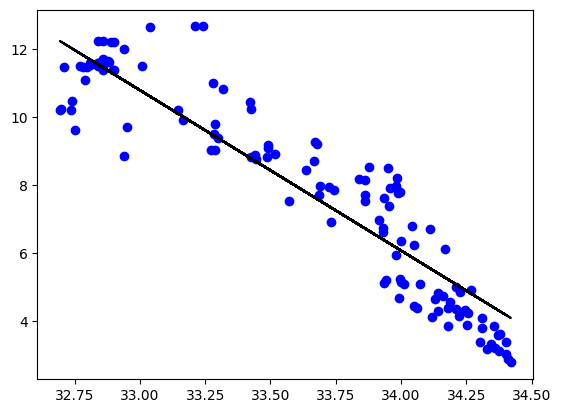

In [46]:
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
 
plt.show()

Calculate metrics

In [47]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
 
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
 
print("MAE:",mae) #Mean average error
print("MSE:",mse) # Mean squared error
print("RMSE:",rmse) # Real Mean squared error?

MAE: 0.8700270732769138
MSE: 1.1711742046650722
RMSE: 1.0822080228242037
